In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truety

In [ ]:
from matplotlib import rc
import matplotlib.font_manager as fm
import matplotlib
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:\\Windows\\Fonts\\malgun.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
import sqlite3
import pandas as pd

# SQLite 데이터베이스 파일 경로 지정 (예: database.db)
db_path = "./asia.db"

# 데이터베이스 연결
conn = sqlite3.connect(db_path)

# 테이블 데이터 불러오기
query = "SELECT * FROM processing"
df = pd.read_sql_query(query, conn)


In [ ]:
query = "SELECT * FROM duty_element"
df_duty_element = pd.read_sql_query(query, conn)

In [ ]:
duty_element = list(df_duty_element['name'])

In [ ]:
duty_element

['PM',
 '데이터 직무',
 '백엔드',
 '인프라 엔지니어',
 '앱 개발자',
 '게임',
 'AI',
 '임베디드',
 '프론트 엔드',
 'QA',
 '데이터 분석',
 'VR',
 '시스템',
 '블록체인',
 'ERP',
 '언어별 개발자']

## duty

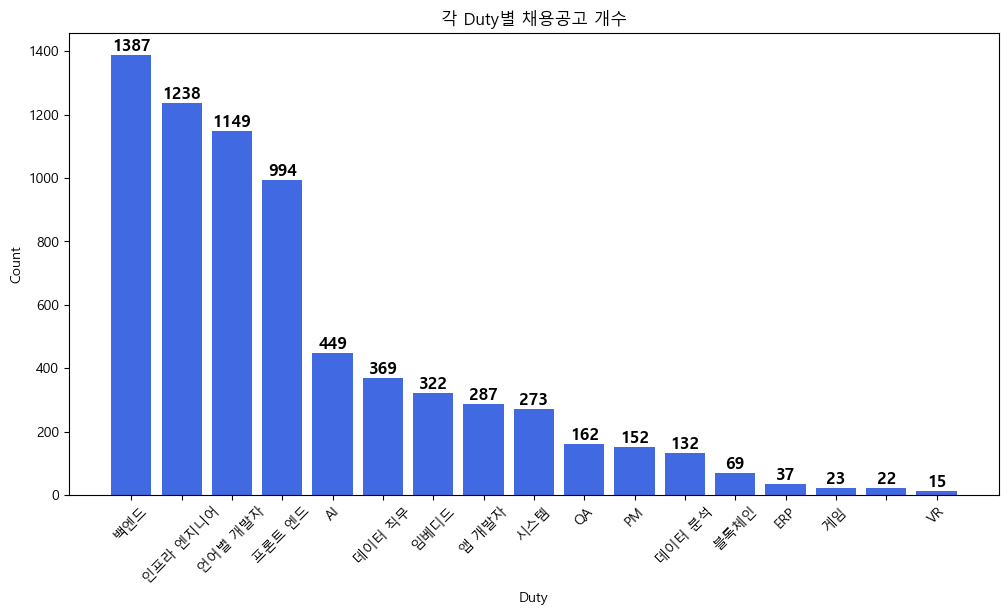

In [ ]:
df_duty = df.copy()

df_duty["duty"] = df["duty"].fillna("").apply(lambda x: x.split(", "))

df_exploded = df_duty.explode("duty")

duty_counts = df_exploded["duty"].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(duty_counts.index, duty_counts.values, color="royalblue")
plt.xlabel("Duty")
plt.ylabel("Count")
plt.title("각 Duty별 채용공고 개수")
plt.xticks(rotation=45)

for bar, count in zip(bars, duty_counts):
    height = bar.get_height()  # 막대 높이 가져오기
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(count)}",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()


## location

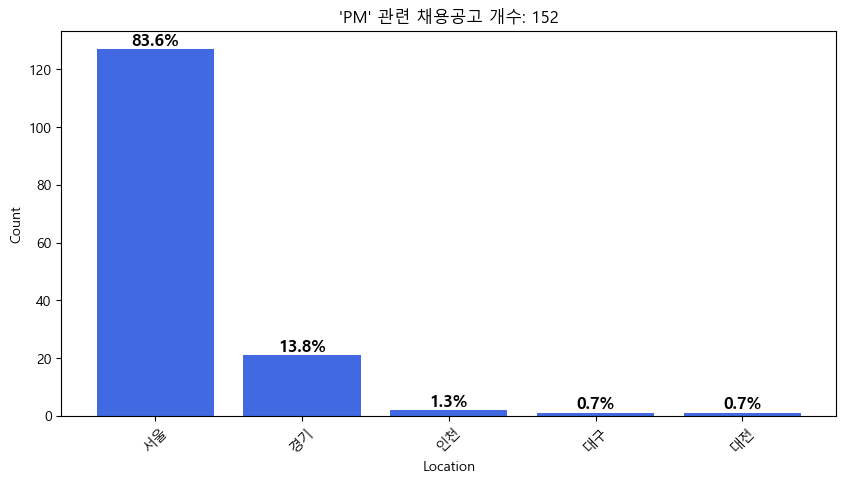

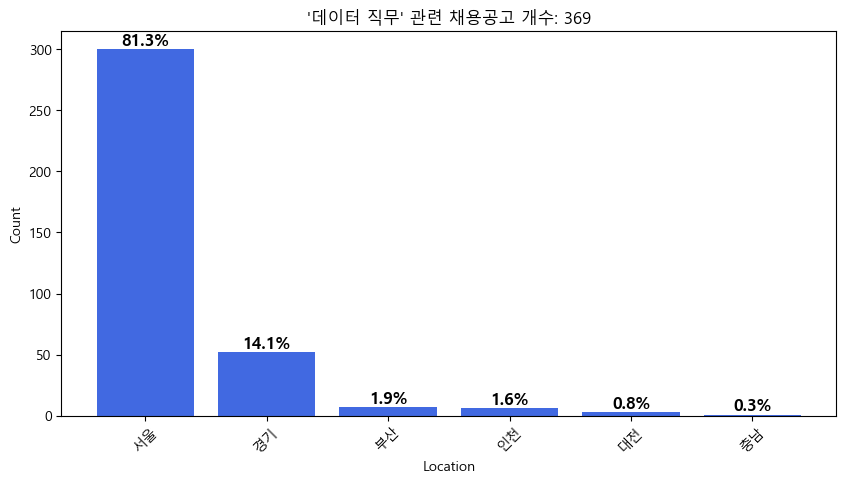

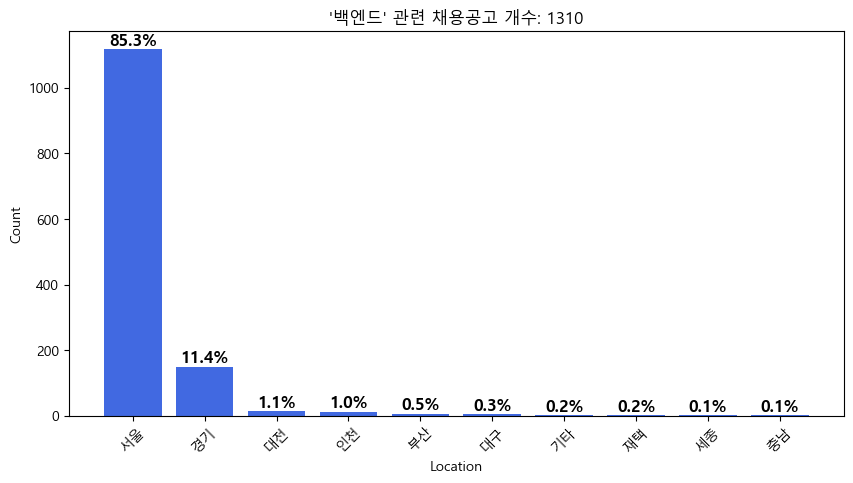

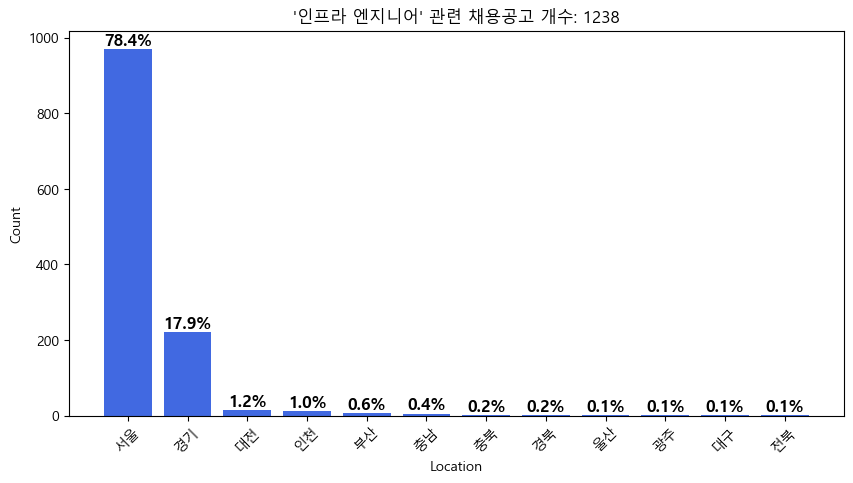

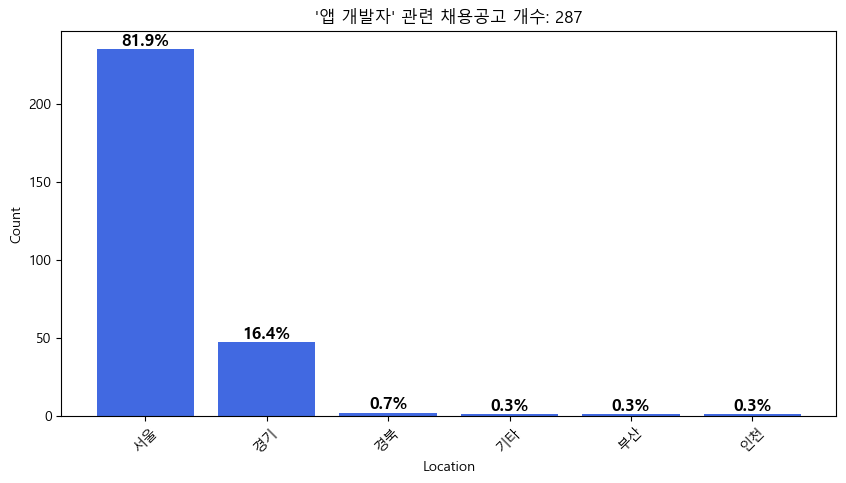

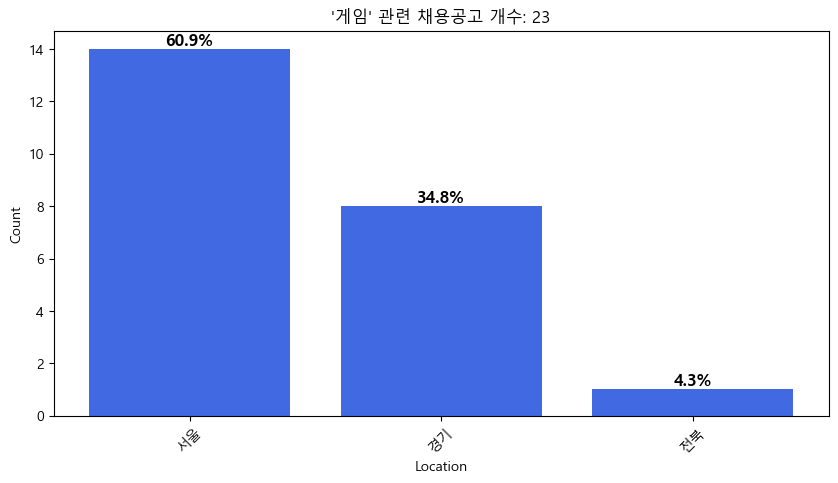

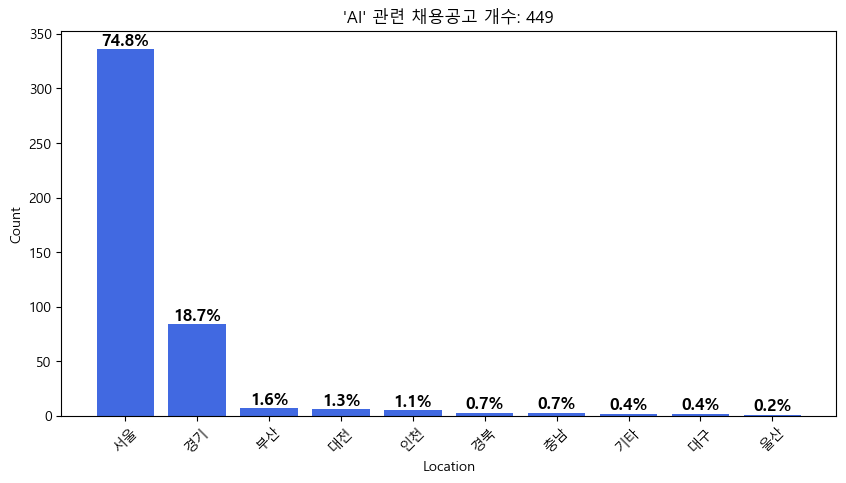

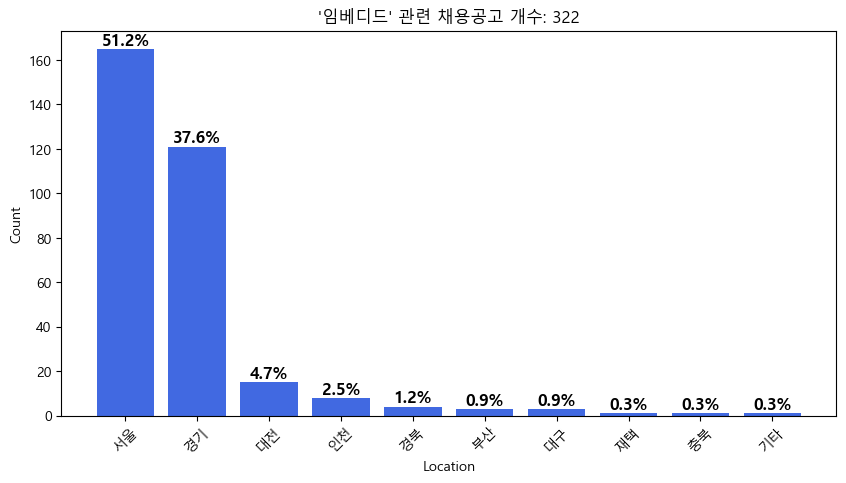

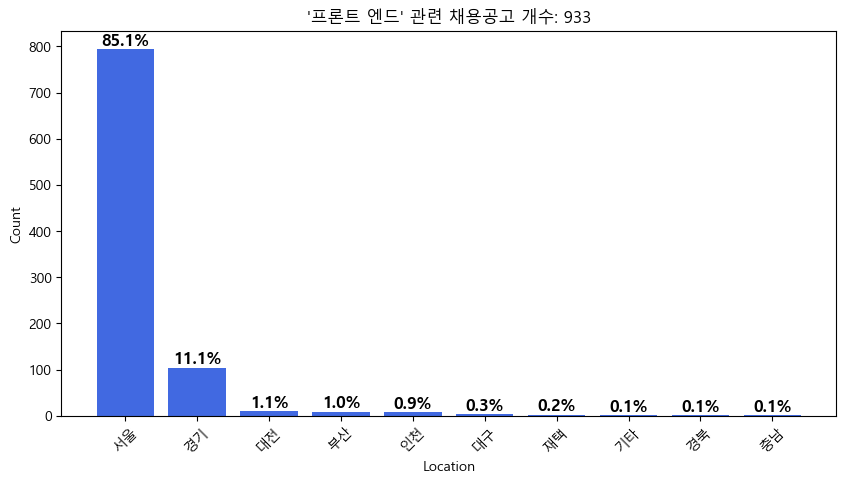

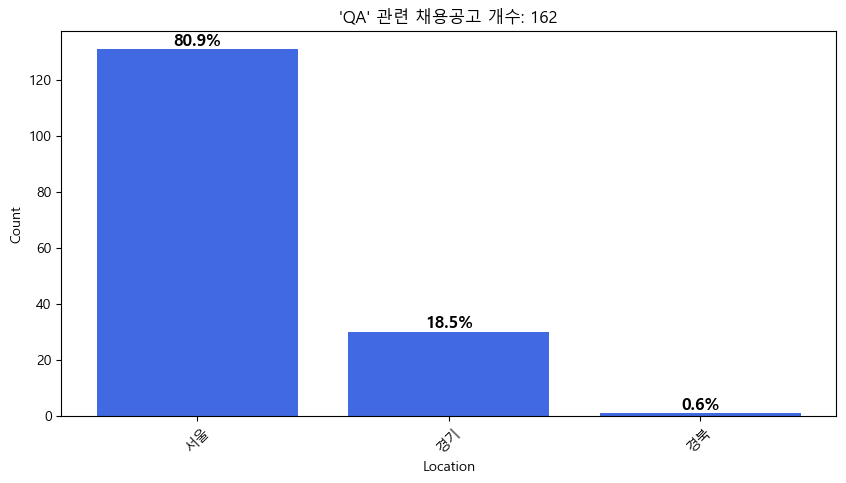

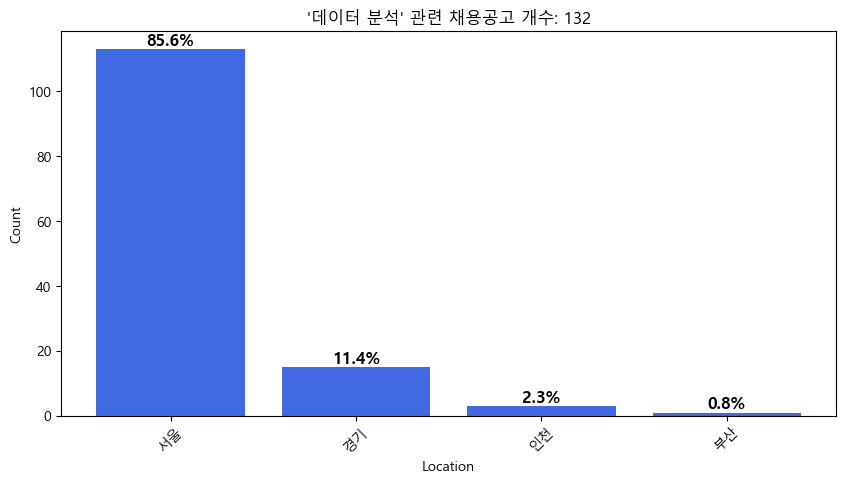

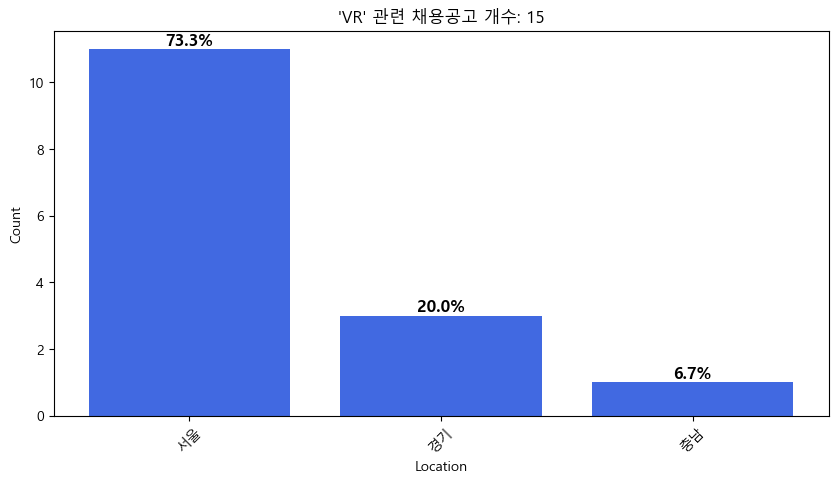

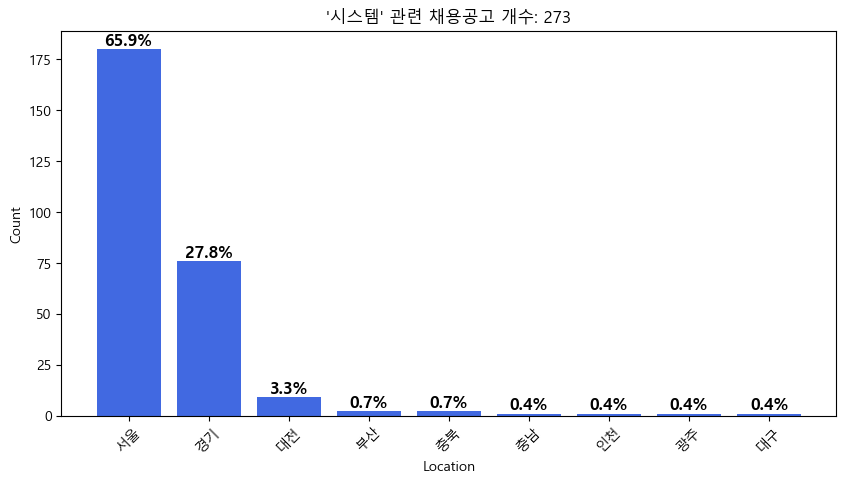

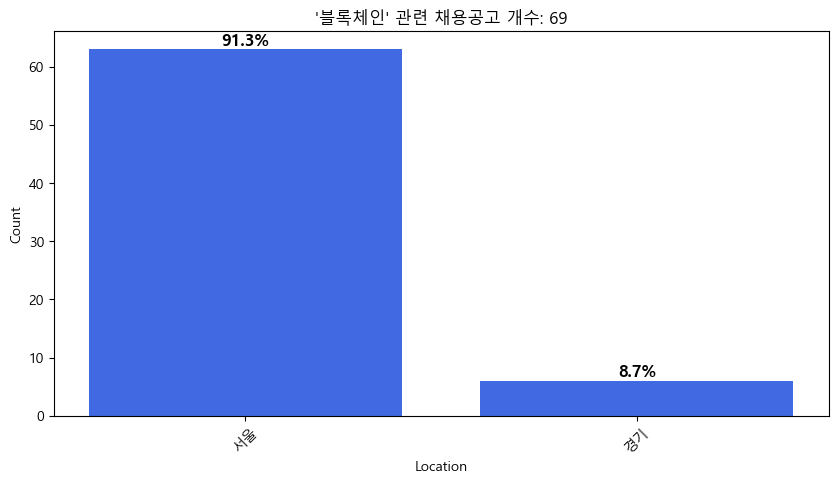

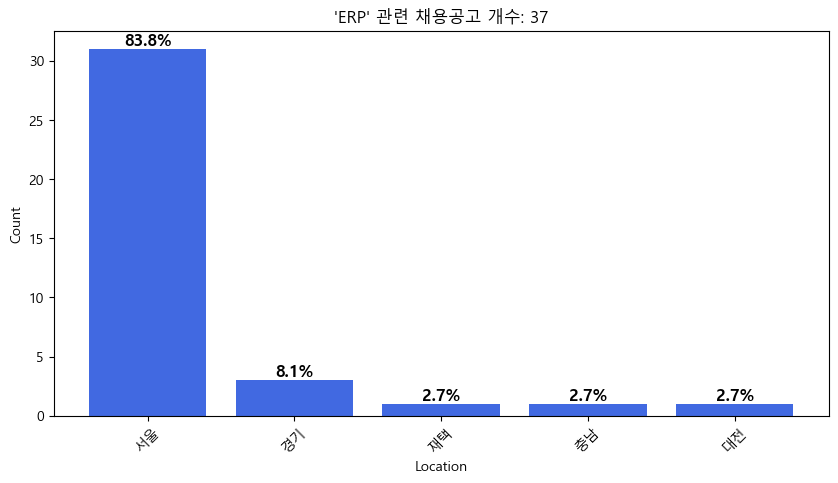

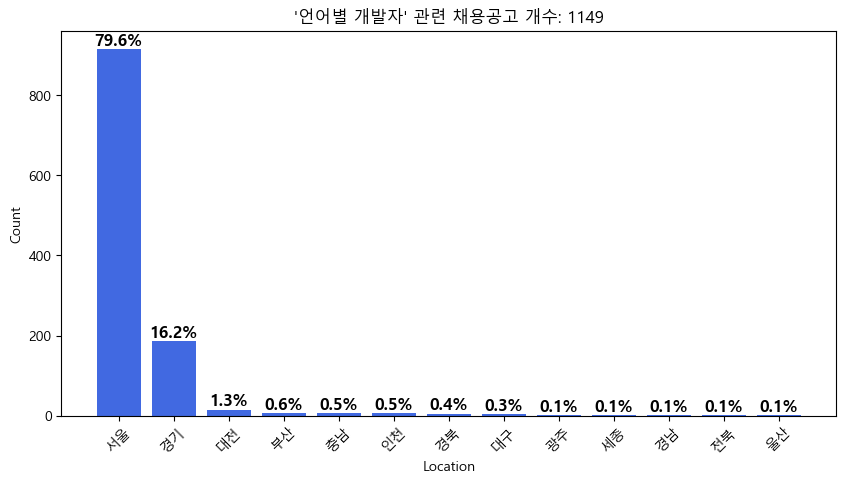

In [ ]:
for duty_name in duty_element:
    a = df[df["duty"].str.contains(duty_name, na=False)]

    location_counts = a["location"].value_counts()  # 개수 계산
    total_count = location_counts.sum()  # 전체 개수 계산
    location_ratios = (location_counts / total_count) * 100  # 비율 변환

    plt.figure(figsize=(10, 5))
    bars = plt.bar(location_counts.index, location_counts.values, color="royalblue")
    plt.xlabel("Location")
    plt.ylabel("Count")
    plt.title(f"'{duty_name}' 관련 채용공고 개수: {total_count}")
    # plt.xticks(rotation=45)

    for bar, ratio in zip(bars, location_ratios):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{ratio:.1f}%",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.show()

## degree

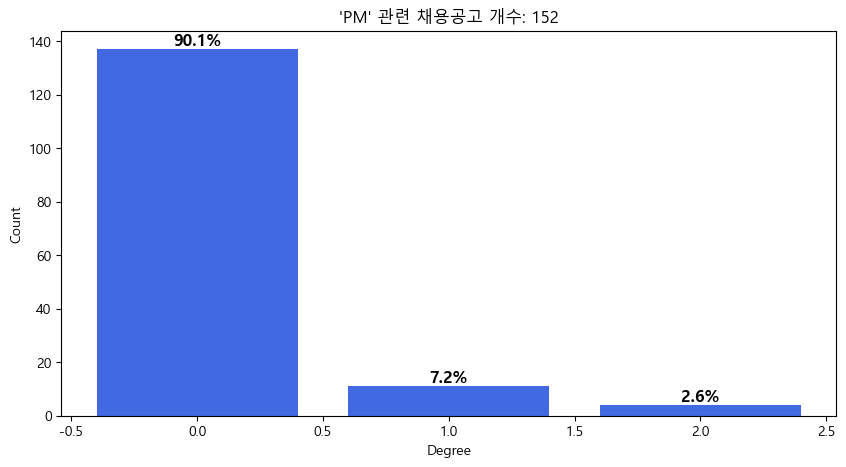

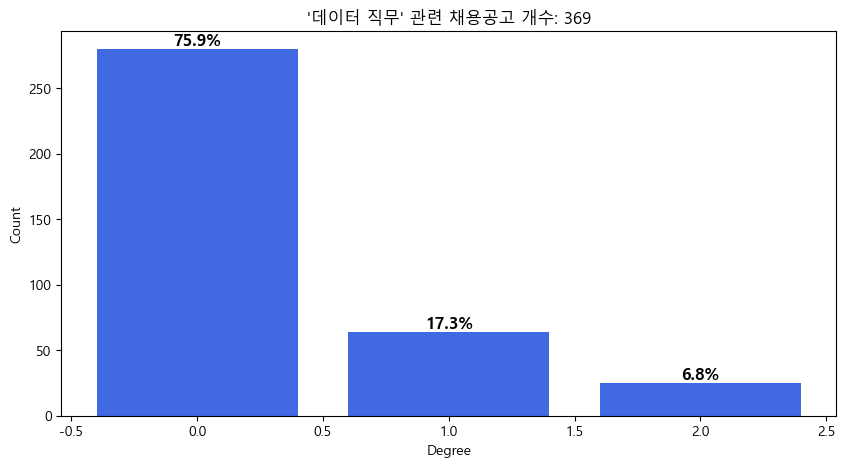

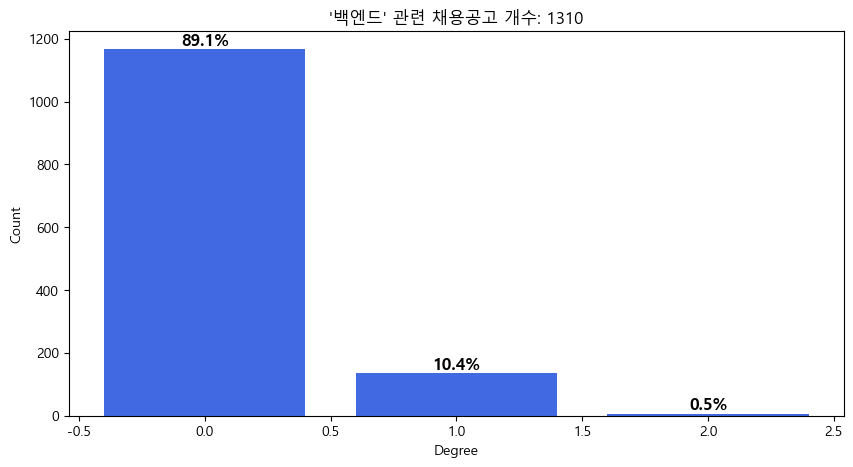

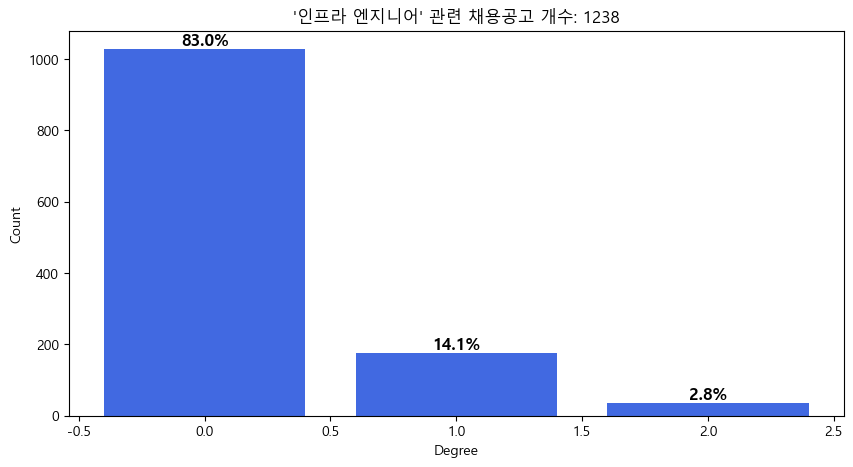

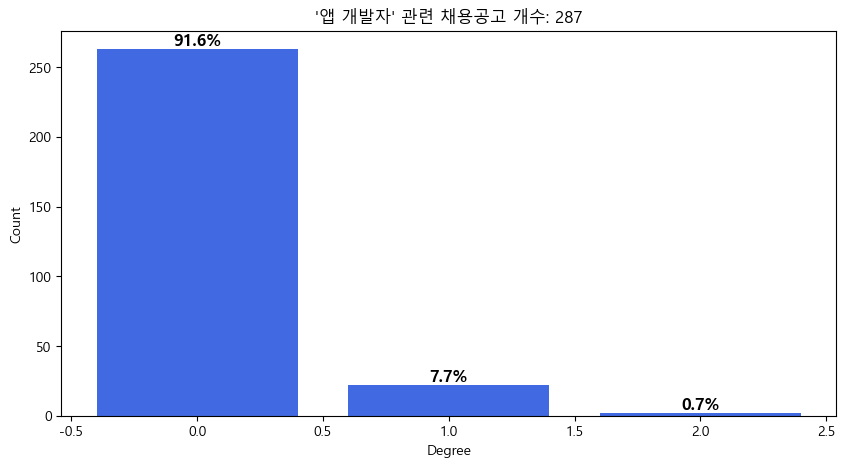

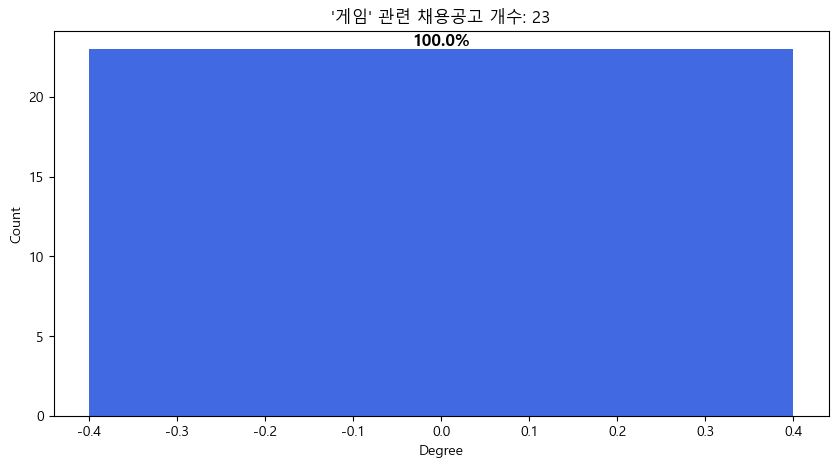

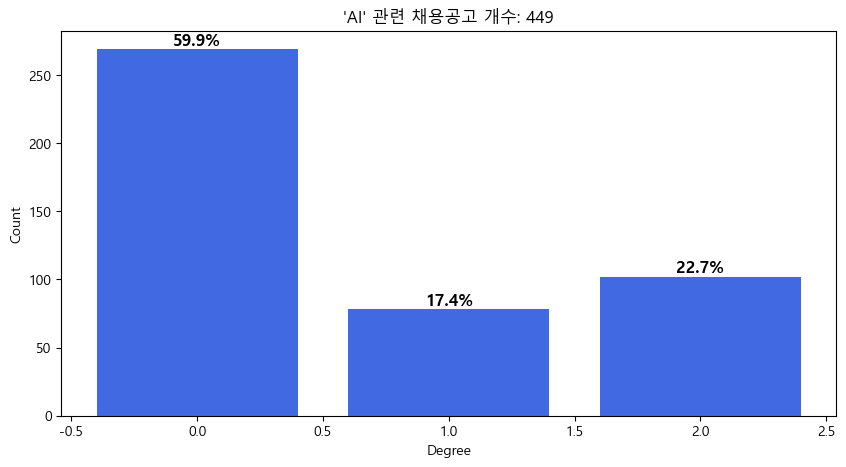

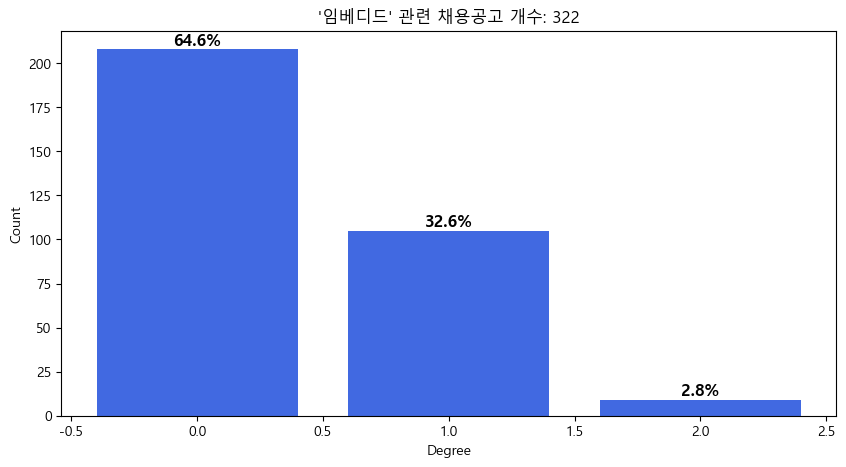

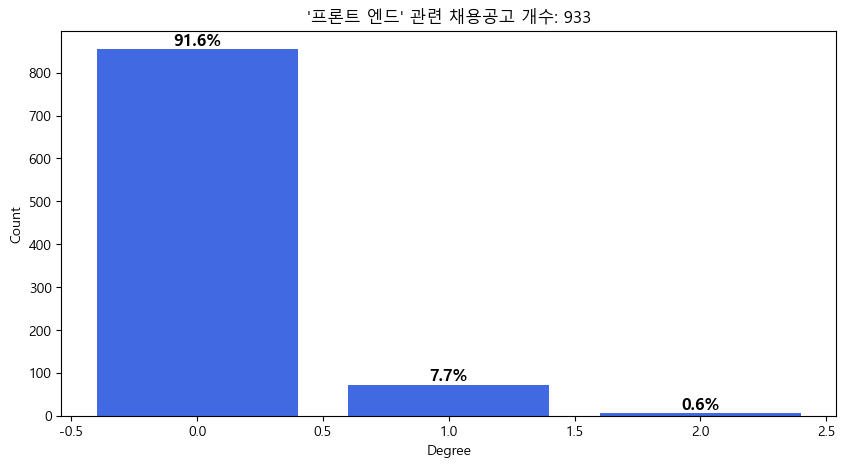

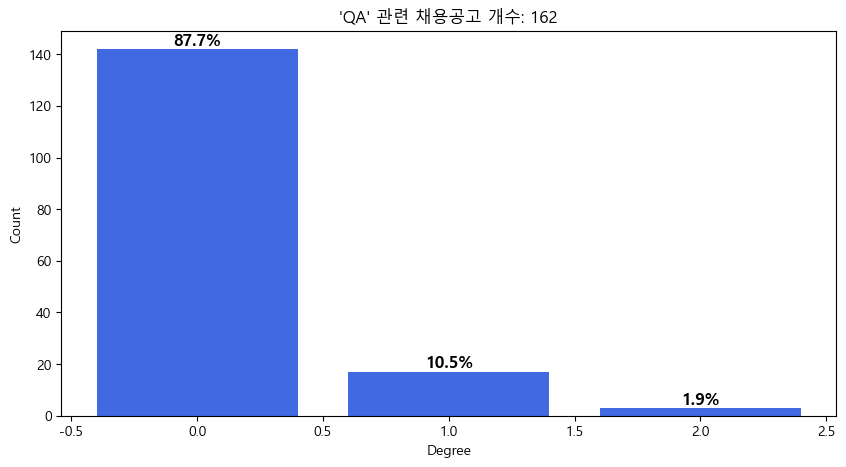

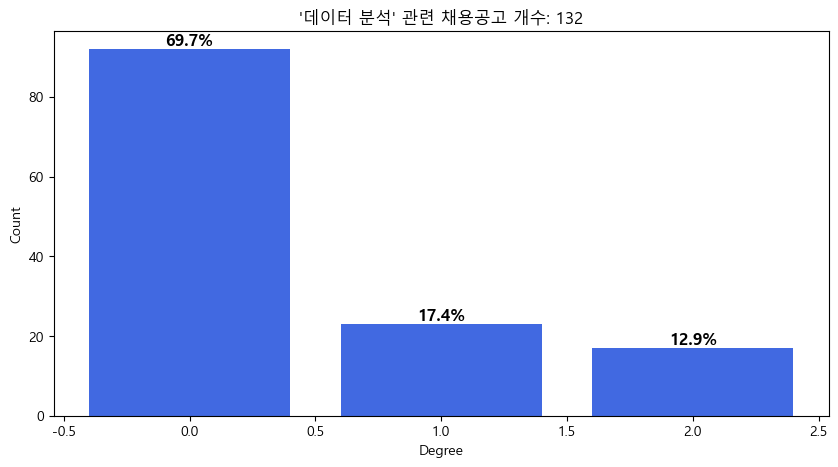

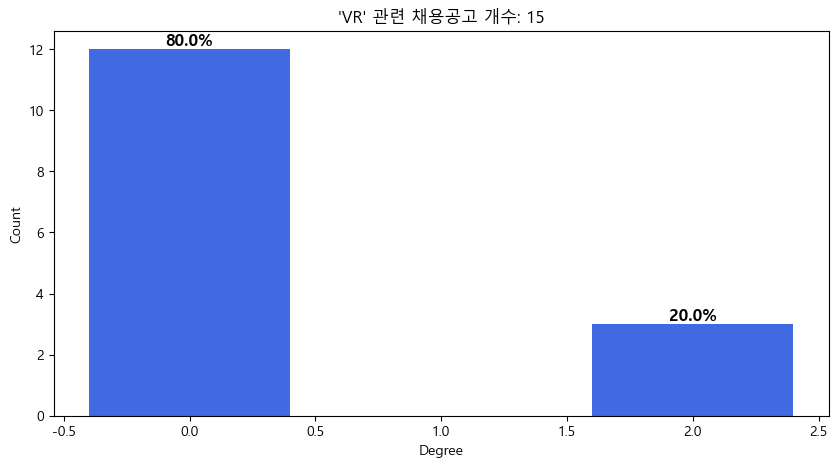

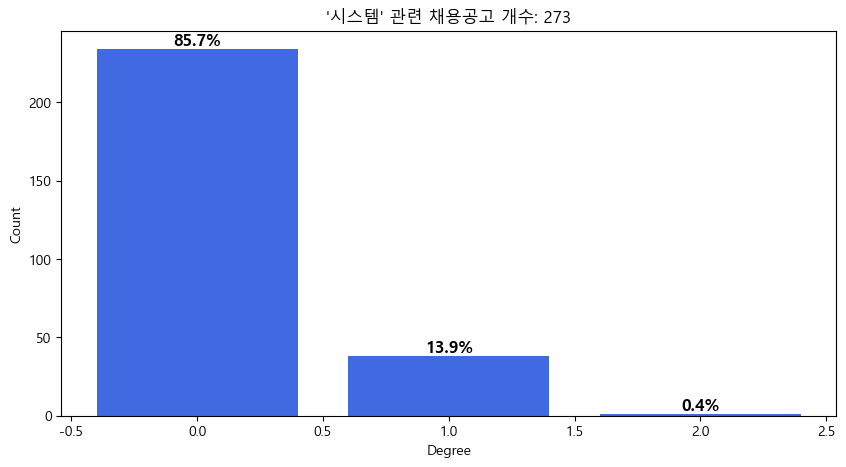

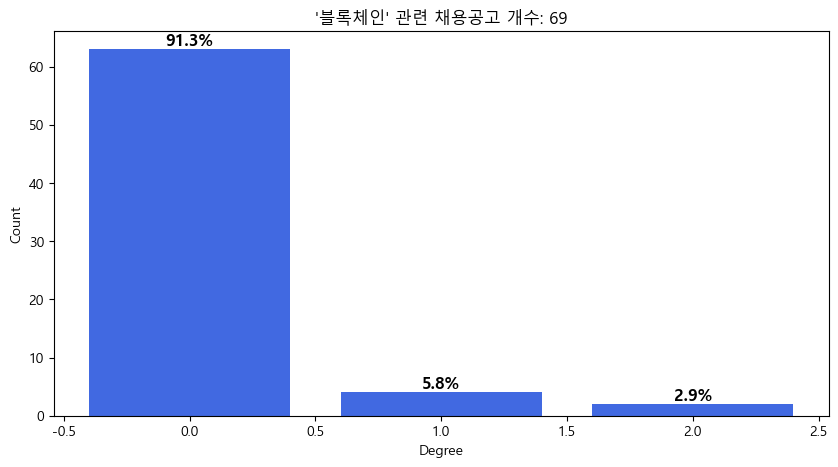

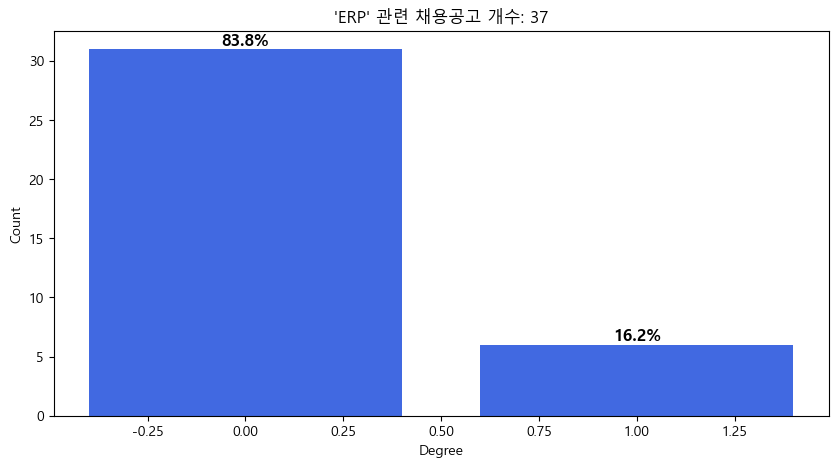

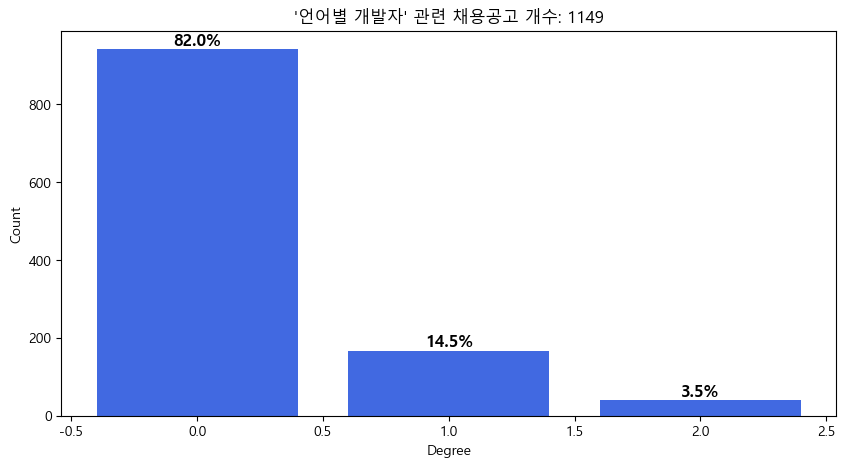

In [ ]:
for duty_name in duty_element:
    a = df[df["duty"].str.contains(duty_name, na=False)]

    degree_counts = a["degree"].value_counts()
    total_count = degree_counts.sum()
    degree_ratios = (degree_counts / total_count) * 100

    plt.figure(figsize=(10, 5))
    bars = plt.bar(degree_counts.index, degree_counts.values, color="royalblue")
    plt.xlabel("Degree")
    plt.ylabel("Count")
    plt.title(f"'{duty_name}' 관련 채용공고 개수: {total_count}")
    # plt.xticks(rotation=45)

    for bar, ratio in zip(bars, degree_ratios):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{ratio:.1f}%",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

    plt.show()

## language

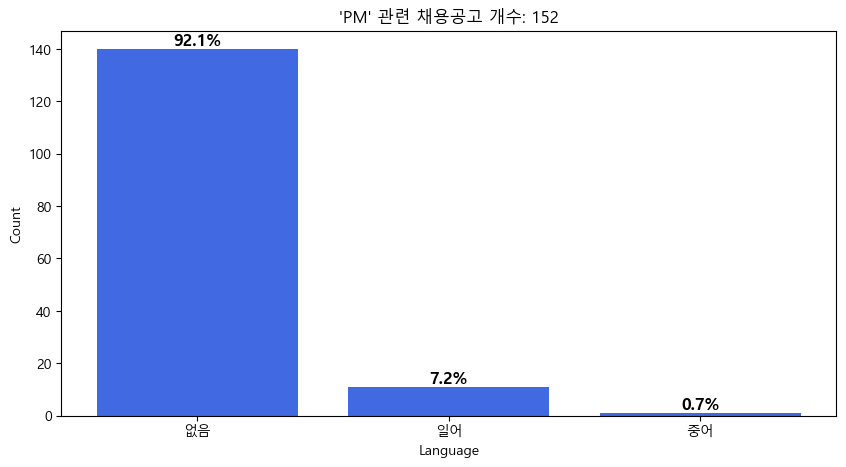

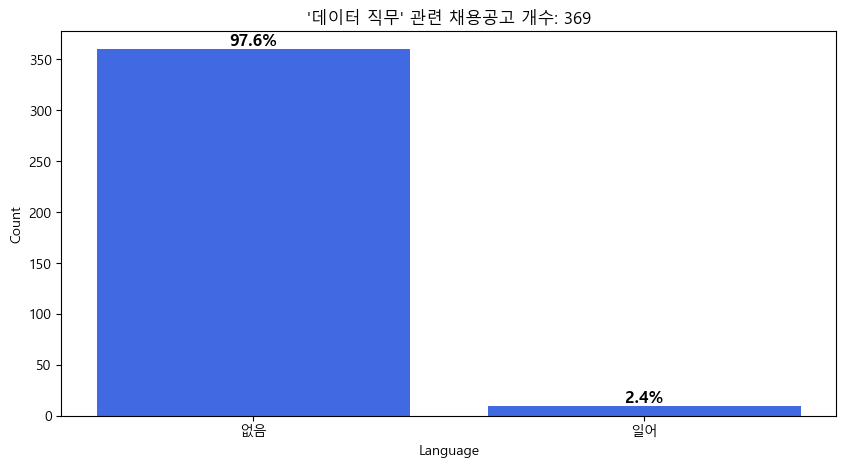

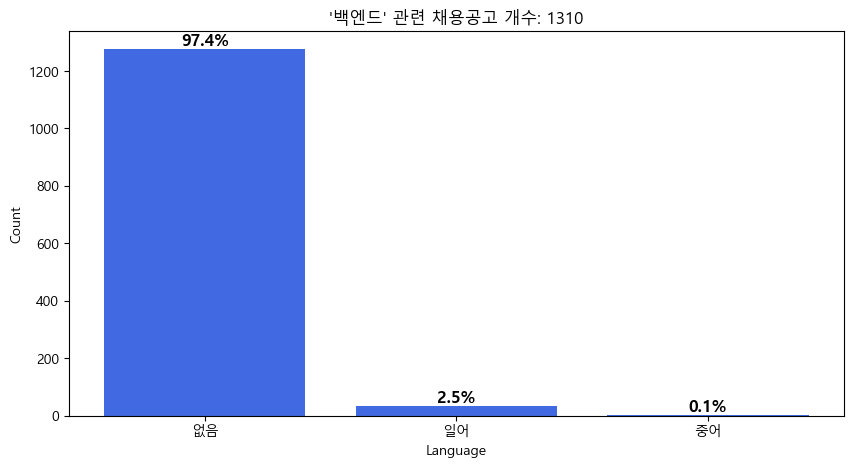

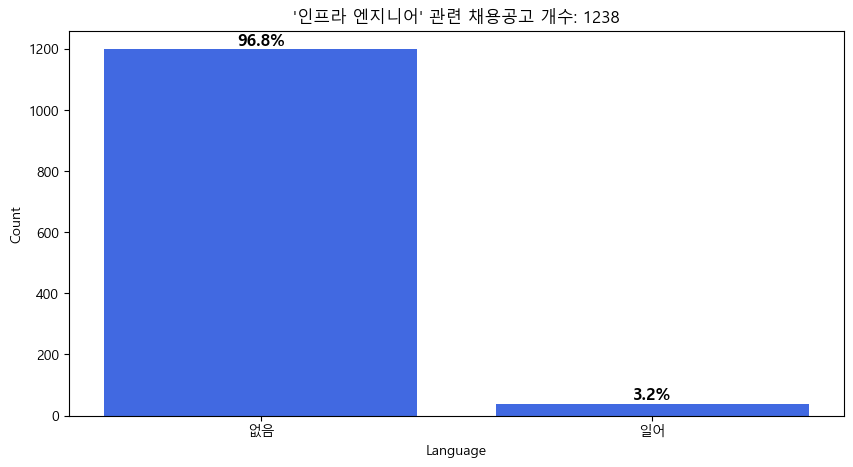

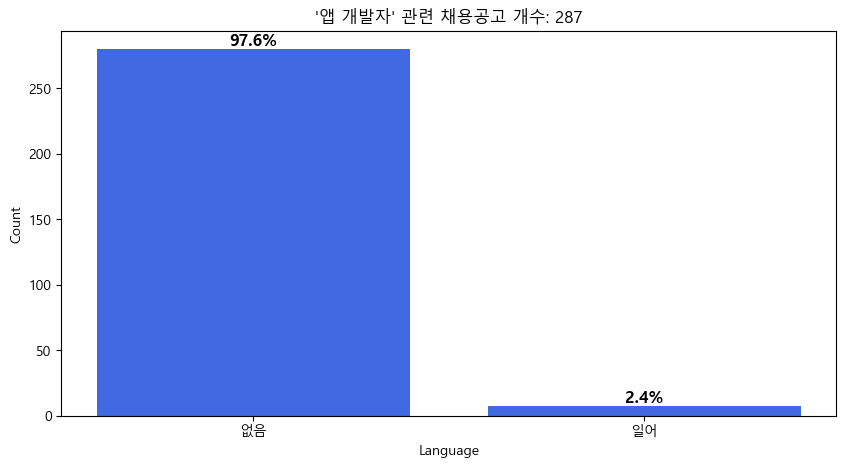

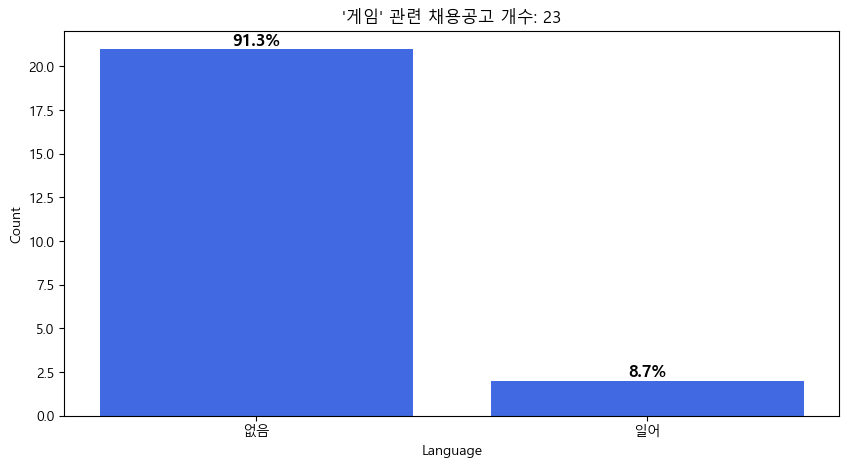

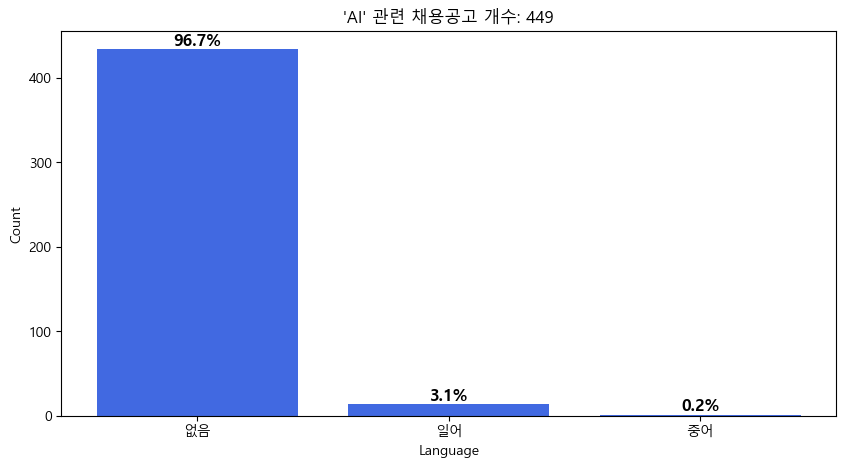

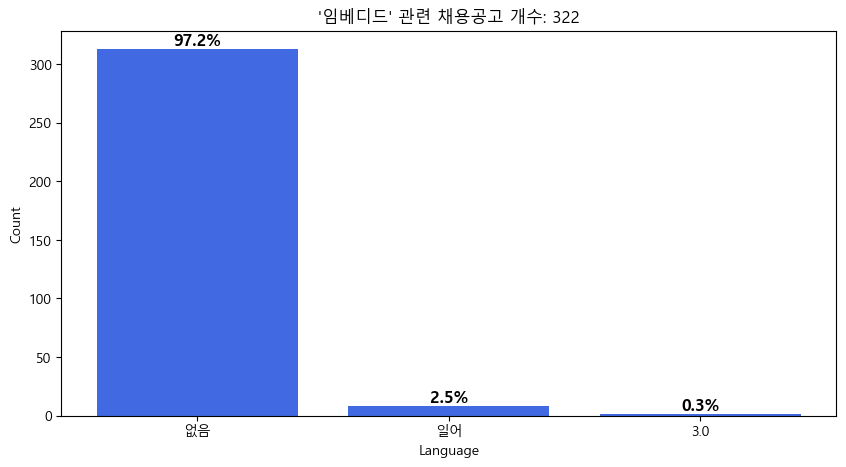

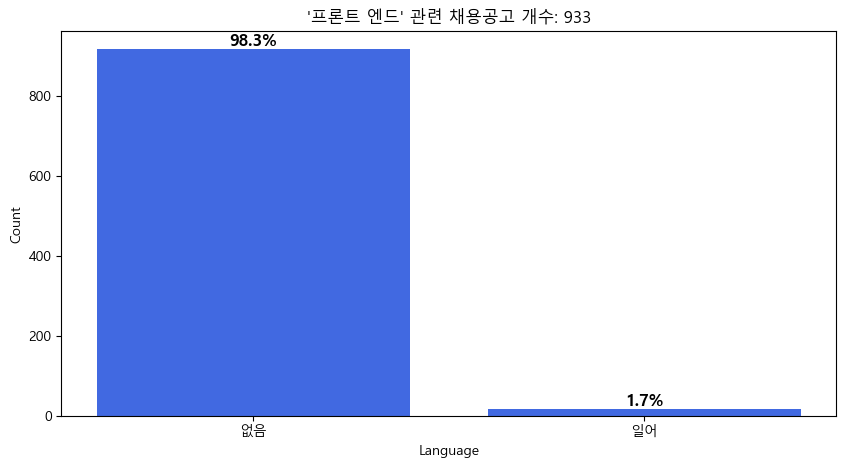

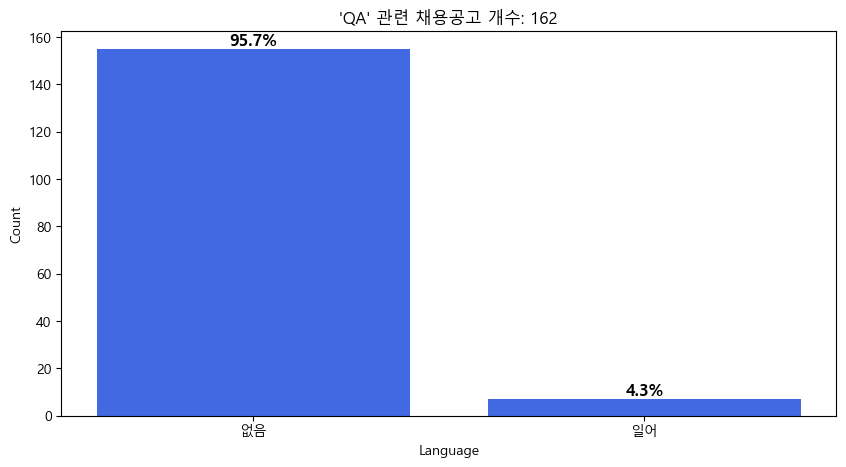

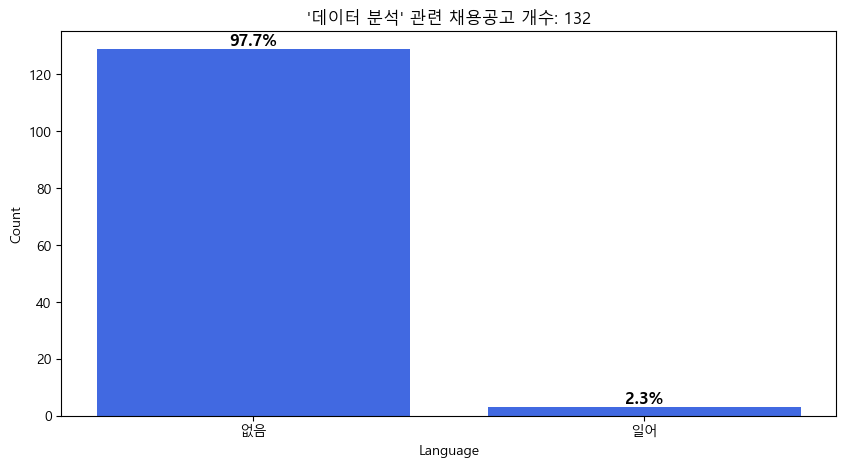

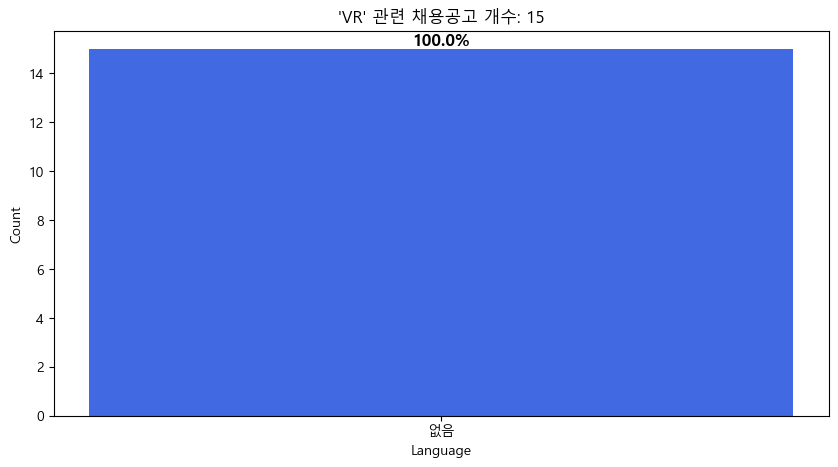

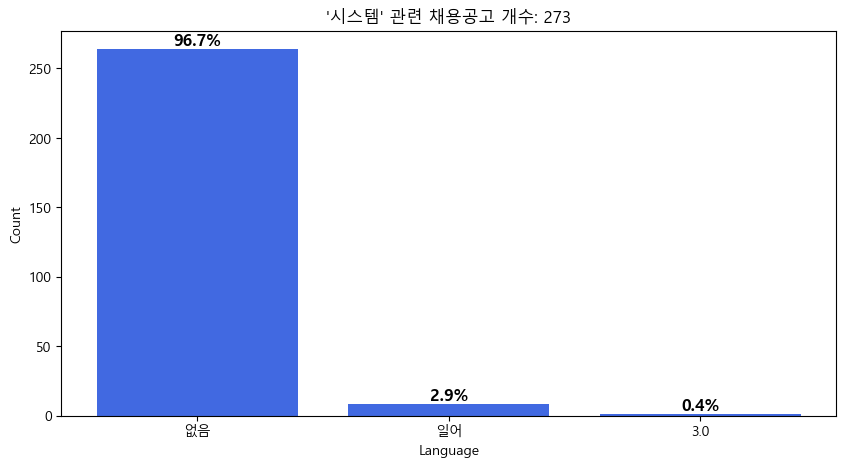

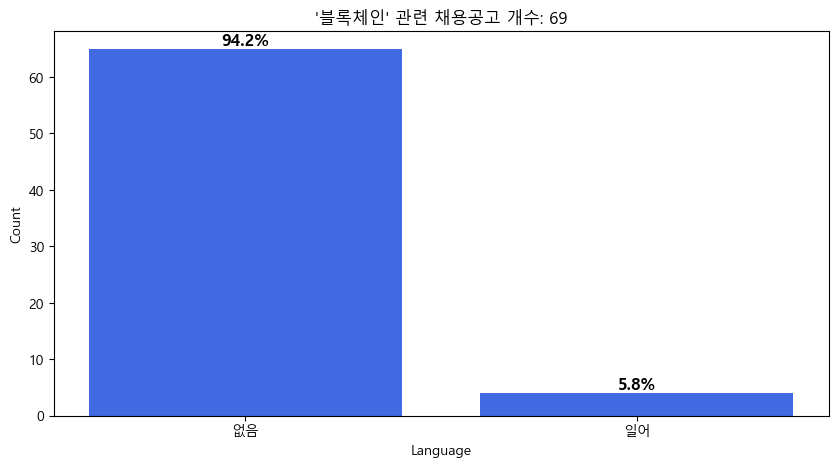

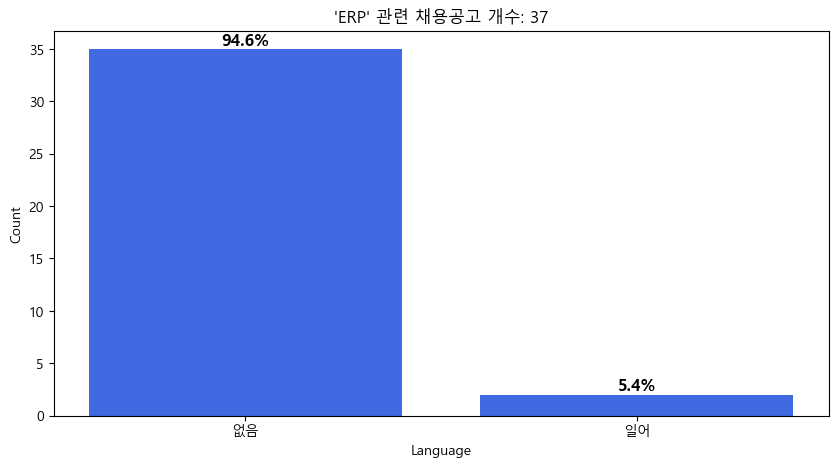

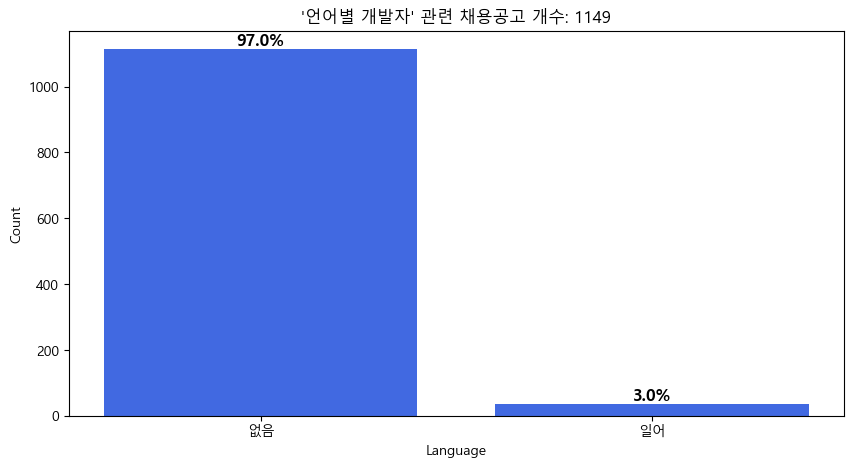

In [ ]:
language_mapping = {0: "영어", 1: "일어", 2: "중어", "None": "없음"}

for duty_name in duty_element:
    a = df[df["duty"].str.contains(duty_name, na=False)]

    language_counts = a["language"].fillna("None").value_counts()
    total_count = language_counts.sum()
    language_ratios = (language_counts / total_count) * 100

    mapped_index = [str(language_mapping.get(idx, str(idx))) for idx in language_ratios.index]

    plt.figure(figsize=(10, 5))
    bars = plt.bar(mapped_index, language_counts.values, color="royalblue")
    plt.xlabel("Language")
    plt.ylabel("Count")
    plt.title(f"'{duty_name}' 관련 채용공고 개수: {total_count}")
    # plt.xticks(rotation=45)

    for bar, ratio in zip(bars, language_ratios):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{ratio:.1f}%",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

    # 그래프 표시
    plt.show()


In [ ]:
a = df[df["duty"].str.contains('임베디드', na=False)]
a["language"].fillna("None").value_counts()

language
None    313
1.0       8
3.0       1
Name: count, dtype: int64

## career

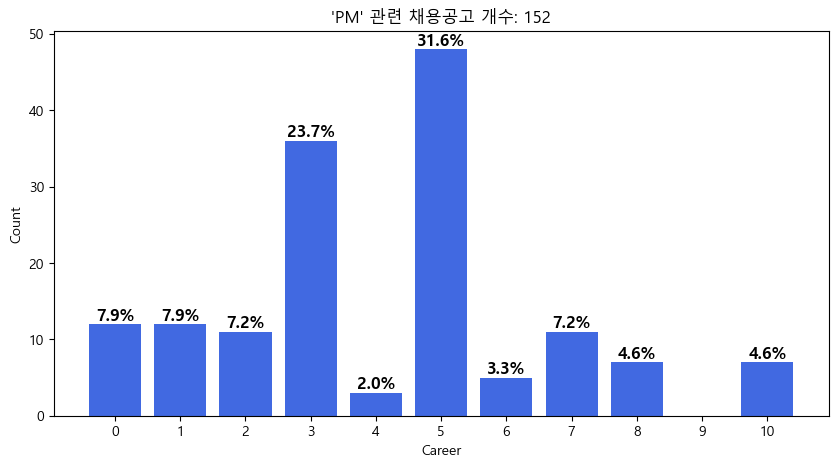

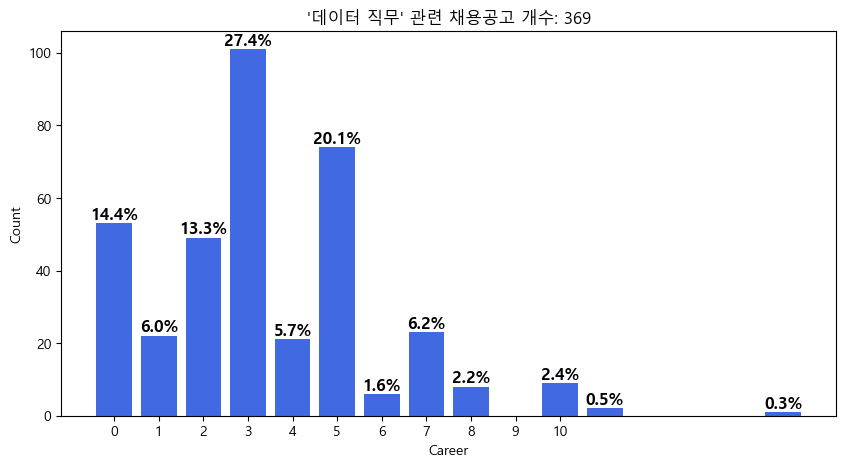

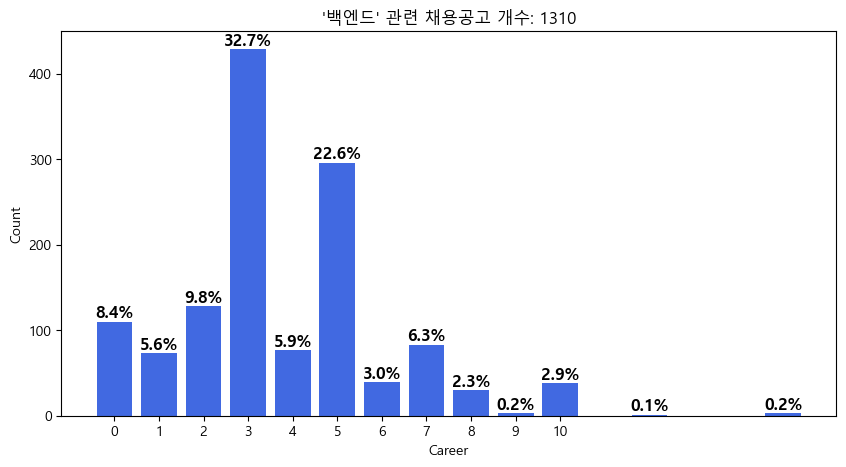

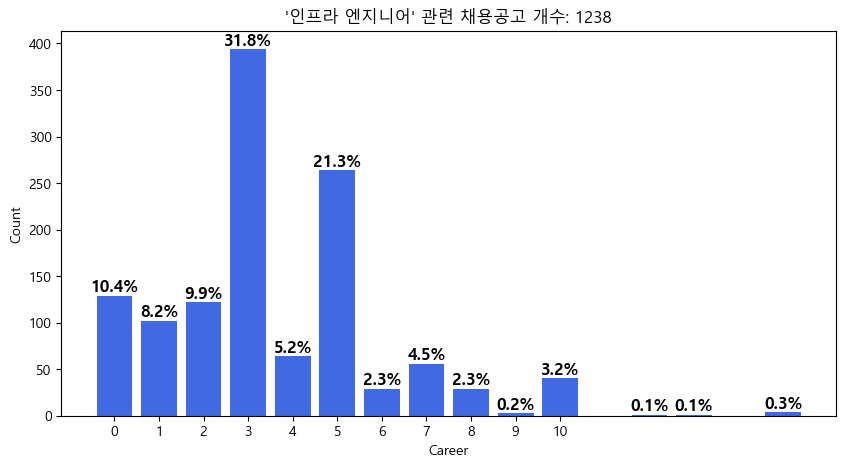

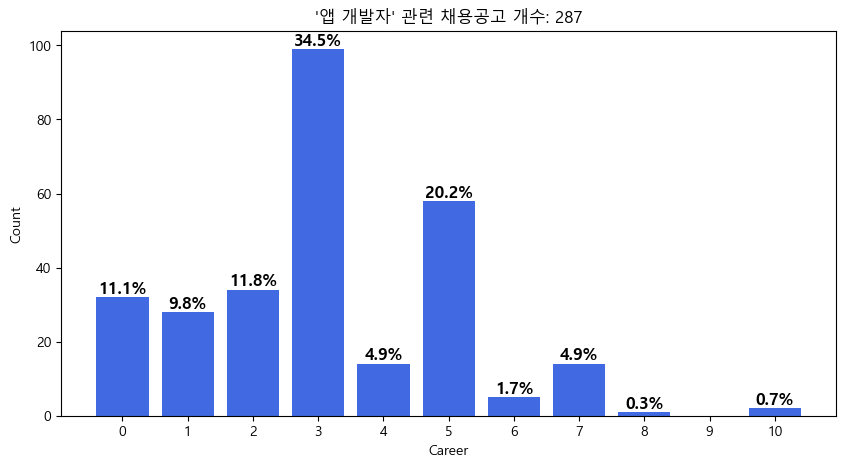

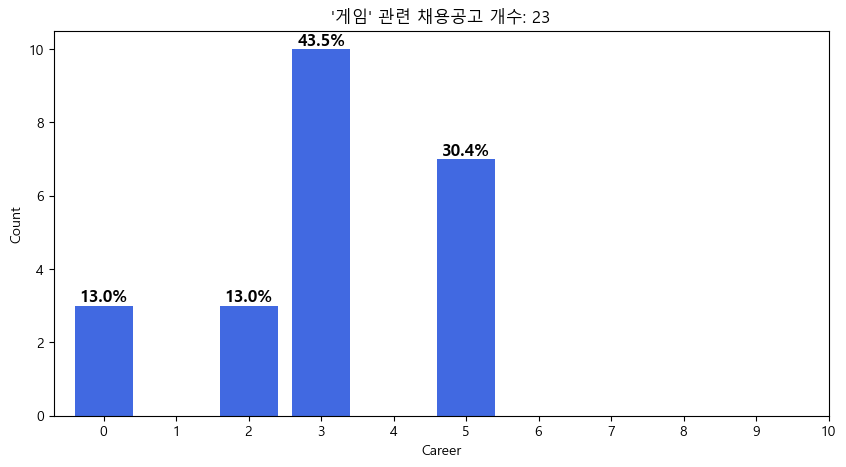

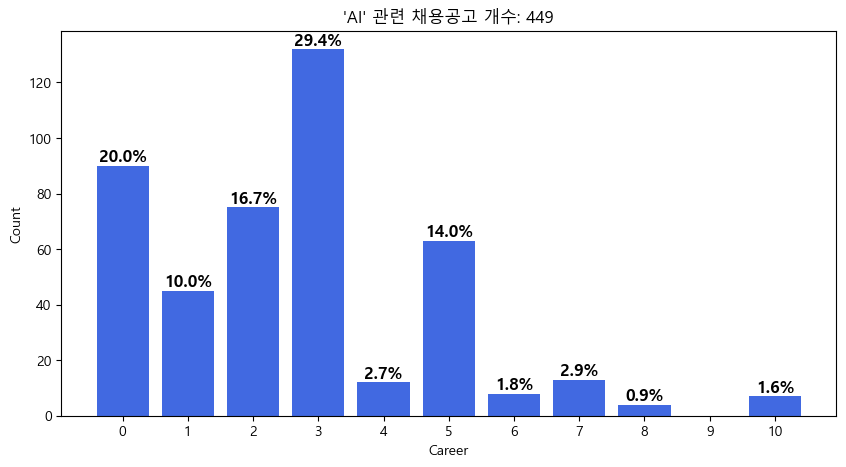

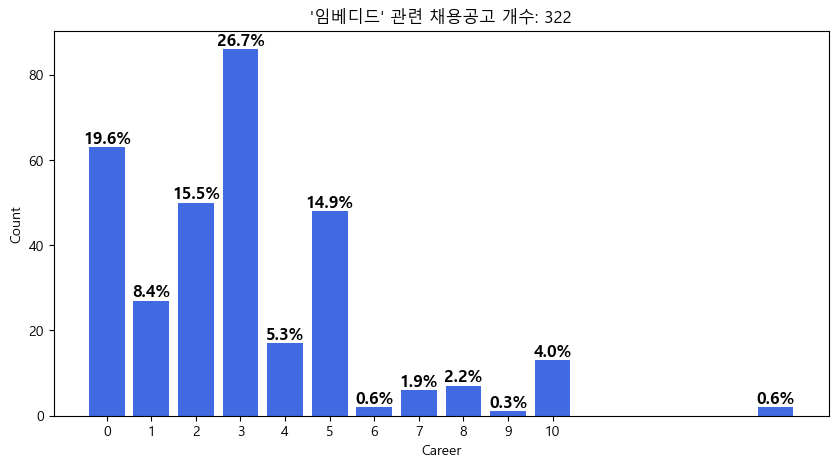

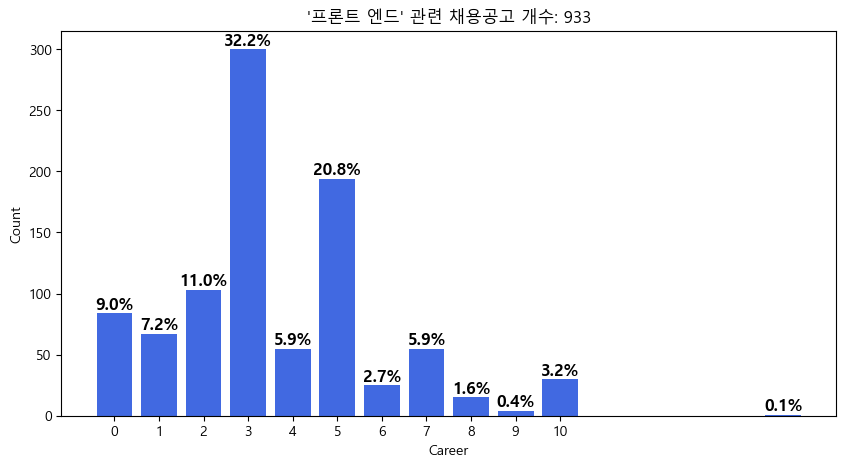

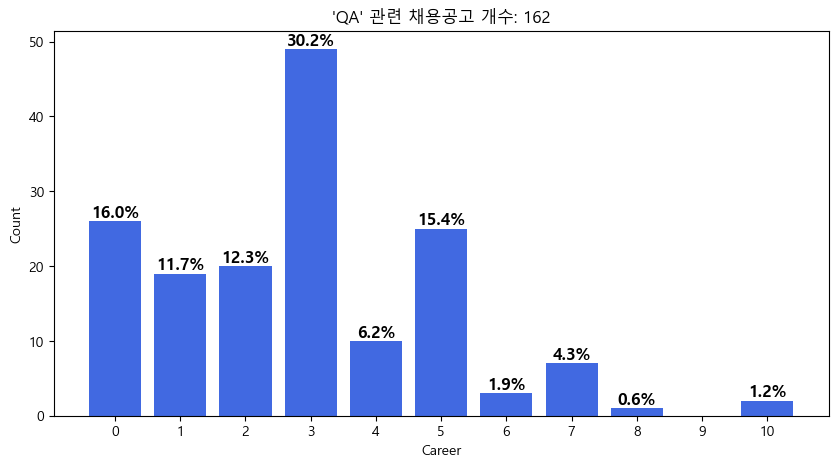

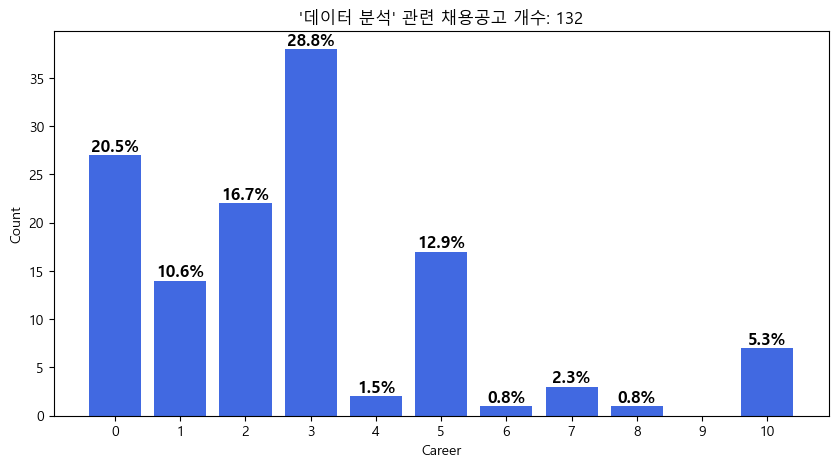

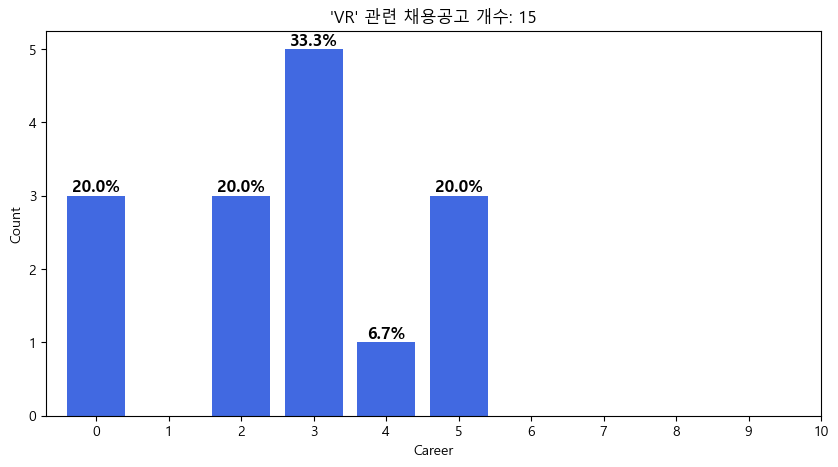

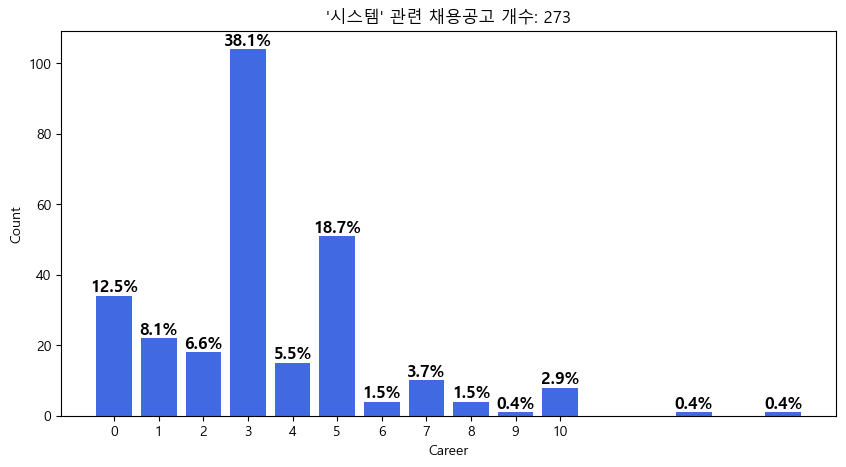

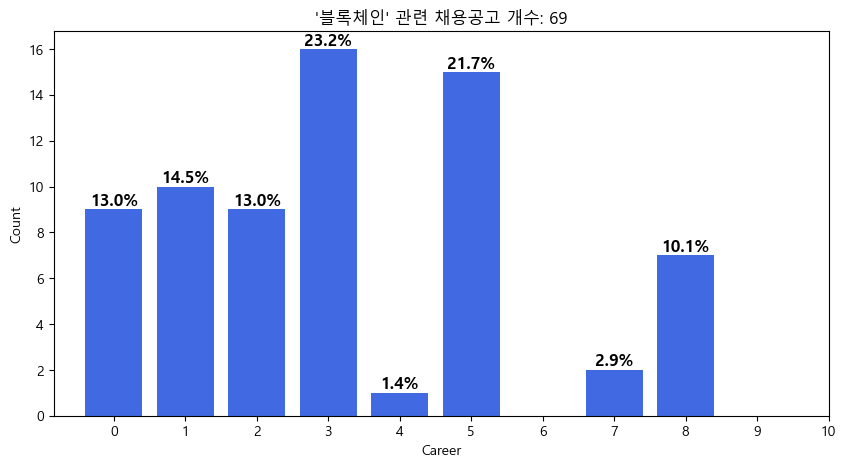

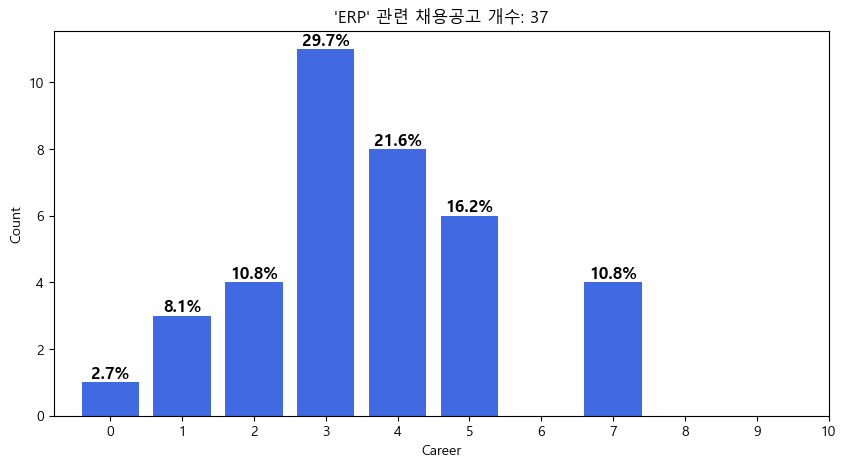

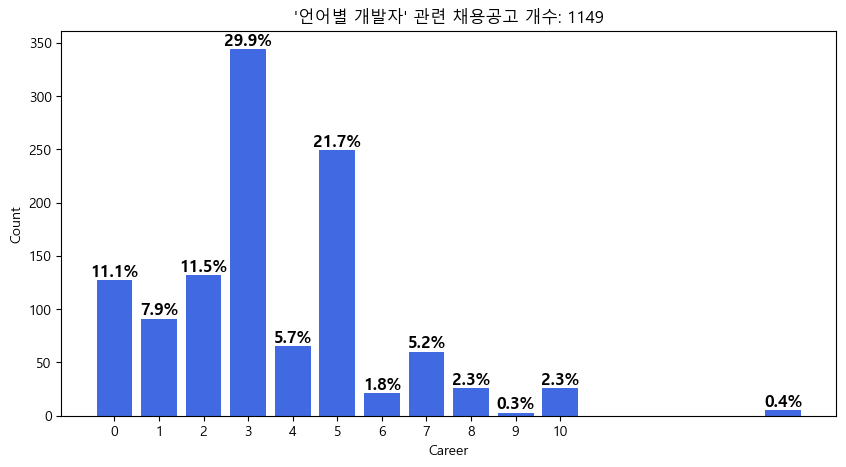

In [ ]:
for duty_name in duty_element:
    a = df[df["duty"].str.contains(duty_name, na=False)]

    career_counts = a["career"].value_counts()
    total_count = career_counts.sum()
    career_ratios = (career_counts / total_count) * 100  # 퍼센트 변환

    plt.figure(figsize=(10, 5))
    bars = plt.bar(career_counts.index, career_counts.values, color="royalblue")
    plt.xlabel("Career")
    plt.ylabel("Count")
    plt.title(f"'{duty_name}' 관련 채용공고 개수: {total_count}")
    plt.xticks(range(11))

    for bar, ratio in zip(bars, career_ratios):
        height = bar.get_height()  # 막대 높이 가져오기
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{ratio:.1f}%",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

    # 그래프 표시
    plt.show()

## test

In [ ]:
test = df[df["duty"].str.contains('데이터 분석', na=False)]

In [ ]:
test.to_csv('test.csv', encoding = 'utf-8-sig', index = False)

In [ ]:
df.to_csv('skill_probability.csv', encoding = 'utf-8-sig', index = False)

In [ ]:
df_duty = df.copy()

df_duty["duty"] = df["duty"].fillna("").apply(lambda x: x.split(", "))

df_exploded = df_duty.explode("duty")

In [ ]:
# 각 컬럼의 null 값 개수 계산
null_counts = df.isnull().sum()

# 결과 출력
print(null_counts)


seq                 0
url                 0
title               0
location            0
company_name        0
duty               22
degree              0
language         3825
career              0
morpheme            0
pre_morpheme        0
it_language      1380
framework        2503
library          2943
tool             2066
pre_language     3080
pre_framework    3295
pre_library      3577
pre_tool         2379
crawling_dt         0
dtype: int64
